In [10]:
import numpy as np
import os
import sys
from os import path
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
module_path = os.getcwd()
sys.path.append(module_path)
# 주피터에서 . 이런식으로 불러오는거(상대경로) 불가능. 절대경로만 활용

In [7]:
from datasets import cifar_10
from datasets.cifar_10 import membership_dataset_loader

In [ ]:
PATH = os.getcwd()

'c:\\Users\\HDD\\Desktop\\2025\\실험'

In [8]:
member_idx = np.load(PATH + '/datasets/cifar-10/member_idx.npy')
nonmember_idx = np.load(PATH + '/datasets/cifar-10/nonmember_idx.npy')
shadow_idx = np.load(PATH + '/datasets/cifar-10/shadow_idx.npy')

member, nonmember, shadow = membership_dataset_loader(member_idx, nonmember_idx, shadow_idx)

In [9]:
member_image, _ = next(iter(member))
nonmember_image, _ = next(iter(nonmember))

member_image = member_image.detach().cpu().numpy()
nonmember_image = nonmember_image.detach().cpu().numpy()

member_image_flat = member_image.reshape(1024, -1)
nonmember_image_flat = nonmember_image.reshape(1024, -1)

X = np.vstack([member_image_flat, nonmember_image_flat])
y = np.array([1] * 1024 + [0] * 1024)

In [12]:
X_pca = PCA(n_components=2).fit_transform(X)
X_tsne = TSNE(n_components=2, perplexity=30, n_iter=1000).fit_transform(X)


c:\Users\HDD\anaconda3\envs\pytorch\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


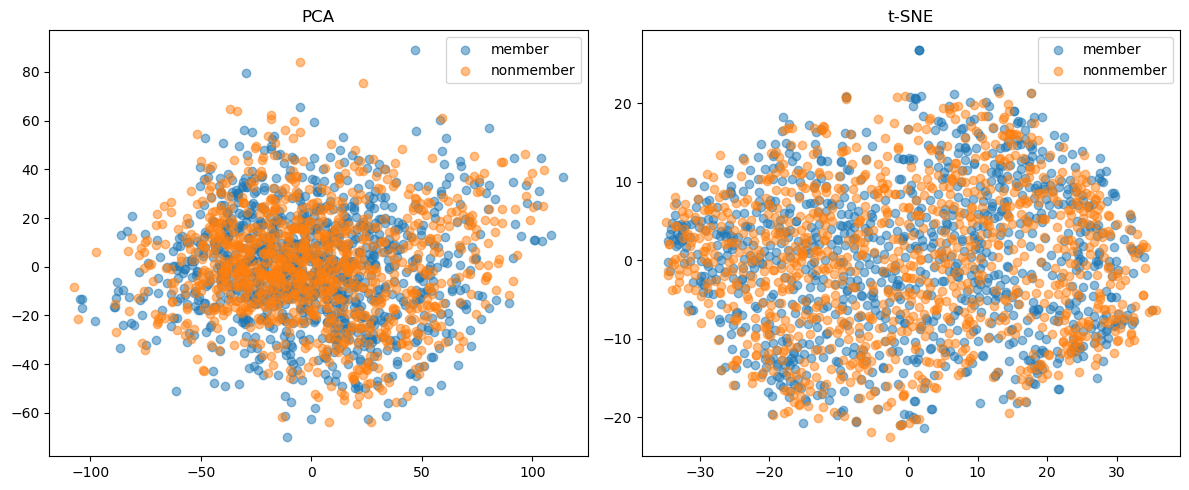

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_pca[y==0,0], X_pca[y==0,1], label='member', alpha=0.5)
plt.scatter(X_pca[y==1,0], X_pca[y==1,1], label='nonmember', alpha=0.5)
plt.title('PCA')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X_tsne[y==0,0], X_tsne[y==0,1], label='member', alpha=0.5)
plt.scatter(X_tsne[y==1,0], X_tsne[y==1,1], label='nonmember', alpha=0.5)
plt.title('t-SNE')
plt.legend()

plt.tight_layout()
plt.show()